##                           Mini Project - UCSD - Python for Data Science

### Mini Project

In this mini project, we focus on an analysis of the world development indicators dataset obtained from 
https://www.kaggle.com/worldbank/world-development-indicators.

#### 1. Dataset exploration
As a first step, we read the Indicators csv file from world development indicators dataset and explore the columns and rows avaliable for analysis. 

#### Import libraries 
We import all needed libraries for exploration.

In [56]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#### Important Note:
If you run this code, please make sure to adapt the path to the dataset

In [83]:
# We read the csv file and get the data into a dataframe
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

##### From above, this looks like a really large dataset with 6 columns. Let's see the columns this dataset holds.

In [84]:
#We get the top 5 rows of the dataset
data.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


#### 2. Continue to explore the dataset
Lets pick a country and an indicator to explore: GDP per capita and India from 1960-2014

In [95]:
#select the indicator - GDP per capita(constant 2005 US$) for India
indicator = 'GDP per capita \(constant 2005'
country = 'India'

#create filters
mask1 = data['IndicatorName'].str.contains(indicator)
mask2 = data['CountryName'].str.contains(country)

#stage is the dataframe matching the indicator and the country for all the available years
stage = data[mask1 & mask2]


In [96]:
stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685
92540,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418
121337,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668


#### 3. Research question
1. How economic liberalisation(reforms in economic policies) effected the GDP per capita (constant 2005 US\$) of India 
2. How the country's contribution to World GDP per capita(constant 2005 US\$) from 1960-2014 has changed

#### Soultion approach
1. First, we will visualize the changes in the GDP per capita using MatplotLib
2. We will calculate the percentage of India cntribution to World GDP per capita over years and plot the values in the form of a scatter plot.
     One approach to calculate the percentage is:
            1. Extract only World GDP and year values
            2. Divide the 'Value' columns in two dataframes (stage,world_stage) 

#### 3.1. Let's see how the GDP per capita changed over years using MatplotLib

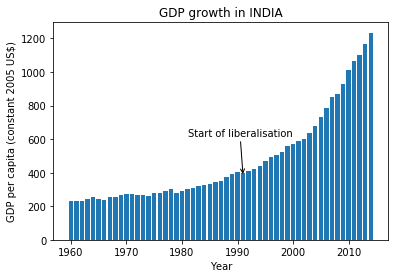

In [93]:
#create a bar graph with year and gdp values

#get the years
years = stage['Year'].values
#get the gdp values
gdp = stage['Value'].values

#plot the bar graph with the values
plt.bar(years,gdp)

plt.title('GDP growth in INDIA')
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#Annotation that points the liberalisation start year i.e.1991
plt.annotate("Start of liberalisation", xy=(1991,380), xycoords='data', xytext=(1981,620), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
plt.show()

#### 3.2. Calculate the percentage of India contribution to World GDP per capita

In [97]:
#select World GDP per capita 
indicator = 'GDP per capita \(constant 2005'
country = 'World'

mask1 = data['IndicatorName'].str.contains(indicator)
mask2 = data['CountryName'].str.startswith(country)

world_stage = data[mask1 & mask2]


In [98]:
world_stage.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3964390,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2005,7230.562930
4144206,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2006,7433.818453
4321802,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2007,7633.013410
4502082,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2008,7649.622632
4681646,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2009,7401.237975
4861651,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,7611.107336
5047035,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,7734.902124
5223277,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,7818.166301
5396580,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,7907.797879
5546137,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,8008.632252


In [99]:
#To divide the columns in two dataframes, we need a common column i.e.Year in this case.
#So, we are setting the 'Year' coulmn as index for two dataframes
stage.set_index('Year', inplace=True)
world_stage.set_index('Year', inplace=True)

#### Let's see how the index got created for the dataframes

In [103]:
stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,228.304470
1961,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,232.142053
1962,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,234.166685
1963,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,243.176418
1964,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,255.963668


In [104]:
world_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3066.332850
1961,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3155.181854
1962,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3274.166163
1963,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3374.815593
1964,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,3525.411667


In [105]:
#Calculate the percentage 
india_contribution = pd.DataFrame()
india_contribution['Value'] = (stage['Value']/world_stage['Value'])*100
india_contribution.tail(20)

,Value
Year,
1995,7.719989
1996,8.000756
1997,7.991328
1998,8.236264
1999,8.633831
2000,8.560218
2001,8.773075
2002,8.883278
2003,9.287199


#### Let's see how the contribution improved over years using scatter plot

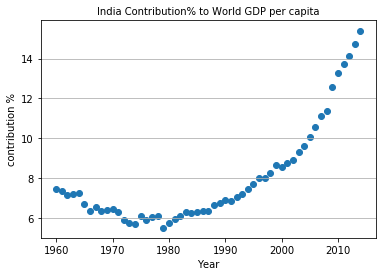

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('India Contribution% to World GDP per capita', fontsize=10)
axis.set_xlabel('Year', fontsize=10)
axis.set_ylabel("contribution %", fontsize=10)

X = india_contribution.index
Y = india_contribution['Value']

axis.scatter(X,Y)
plt.show() 

In [106]:
#Let's see the correlation between India GDP per capita and World GDP per capita
np.corrcoef(stage['Value'],world_stage['Value'])

array([[1.       , 0.8988201],
       [0.8988201, 1.       ]])

The correlation coefficient which is 0.8 shows a stron positive relationship between India GDP per capita and World GDP per capita

#### 4. Findings
1. Economic liberalisation in India has started around 1991.
2. From 1960-1991 i.e. for ~30 years, GDP per capita was between 200-300 GDP per capita (constant 2005 US$). After liberalisation, GDP per capita has increased from ~300 to 1300 in the last 25 years.
3. The impact has predominantly increased the India GDP per capita after 2000's.
4. The growth of  India GDP per capita has a very positive impact on World GDP per capita.
5. India contribution to World GDP per capita has increased very rapidly after 2000's. i.e. from as low as 6% in 1980s to as high as 15% by 2014.
6. A correlation of 0.8 shows a very strong positive relationship between India GDP per capita and World GDP per capita.

We conclude that economic liberalisation has opened doors to the path of economic development and showcased the growth a developing country can achieve by reforming the economic policies.

